Author: Natalia Mesquita

Status: Done

Goals: Build functions to return the worst issue given the store, as well the which sotre have more selected issue.
Ranking the issues per store.

In [1]:
from util import agg_jsonls  # helper function
from pprint import pprint
from src.loading import load_dataset
from src.cleaning import build_df_from_RA
        
reviewsRA = load_dataset("dataset")
df = build_df_from_RA(reviewsRA)
df = df.loc[df.business_name != ""]
print(f"We have a total of {len(reviewsRA)} reviews!")

# Compute responses
def compute_responses_perc(reviews):
    reviews_with_response = [review for review in reviews if "responses" in  review and len(review["responses"]["business"]) > 0]
    reviews_with_no_response = [review for review in reviews if "responses" in  review and len(review["responses"]["business"]) == 0]
    print(f"Total of reviews with response {len(reviews_with_response)} [{round((len(reviews_with_response)/len(reviews))*100, 2)}%]")
    print(f"Total of reviews with NO response {len(reviews_with_no_response)} [{round(100- round((len(reviews_with_response)/len(reviews))*100, 2), 2)}%]")

compute_responses_perc(reviewsRA)

We have a total of 17148 reviews!
Total of reviews with response 14832 [86.49%]
Total of reviews with NO response 2316 [13.51%]


In [2]:
import pandas as pd
company_issues = df.groupby("business_name").count()[[col for col in df.columns if "issue" in col]].reset_index()
company_issues = pd.melt(company_issues,id_vars=["business_name"], value_vars=[col for col in company_issues.columns if "issue" in col], var_name="issue").sort_values(by="value")
round(company_issues.groupby("issue").mean().sort_values(by="value", ascending=False))

,value
issue,
business_issues_Delivery,156.0
business_issues_Customer Services,59.0
product_issues_Quality,53.0
business_issues_Payment,52.0
product_issues_Damaged,25.0
business_issues_Maintenance,22.0
business_issues_Online Services,5.0
product_issues_Missing pieces,3.0
product_issues_Electrical problems,3.0


In [3]:
Stores = df['business_name'].unique()
Stores

array(['Tok&Stok - Loja Online ', 'Tok&Stok - Loja Física', 'Mobly',
       'Etna Home Store - Loja Online', 'Etna Home Store', 'Openbox2',
       'Lojas Guido', 'Viggore Móveis', 'Fabrispuma', 'Móveis Rainha',
       'Marabraz - Loja Online', 'Sylvia Design',
       'Marabraz - Lojas Físicas', 'TUTTI MÓVEIS', 'Lojas Cem',
       'MadeiraMadeira', 'Inovar Móveis e Colchões',
       'Casas Bahia - Marketplace', 'Casas Bahia - Loja Online',
       'Casas Bahia - Lojas Físicas', 'Magazine Luiza - Loja Online',
       'Magazine Luiza - Loja Física', 'Lojas Lebes', 'Lider Interiores',
       'Fast Shop', 'Ponto Frio - Loja Online', 'King Star Colchões'],
      dtype=object)

In [4]:
Stores.shape

(27,)

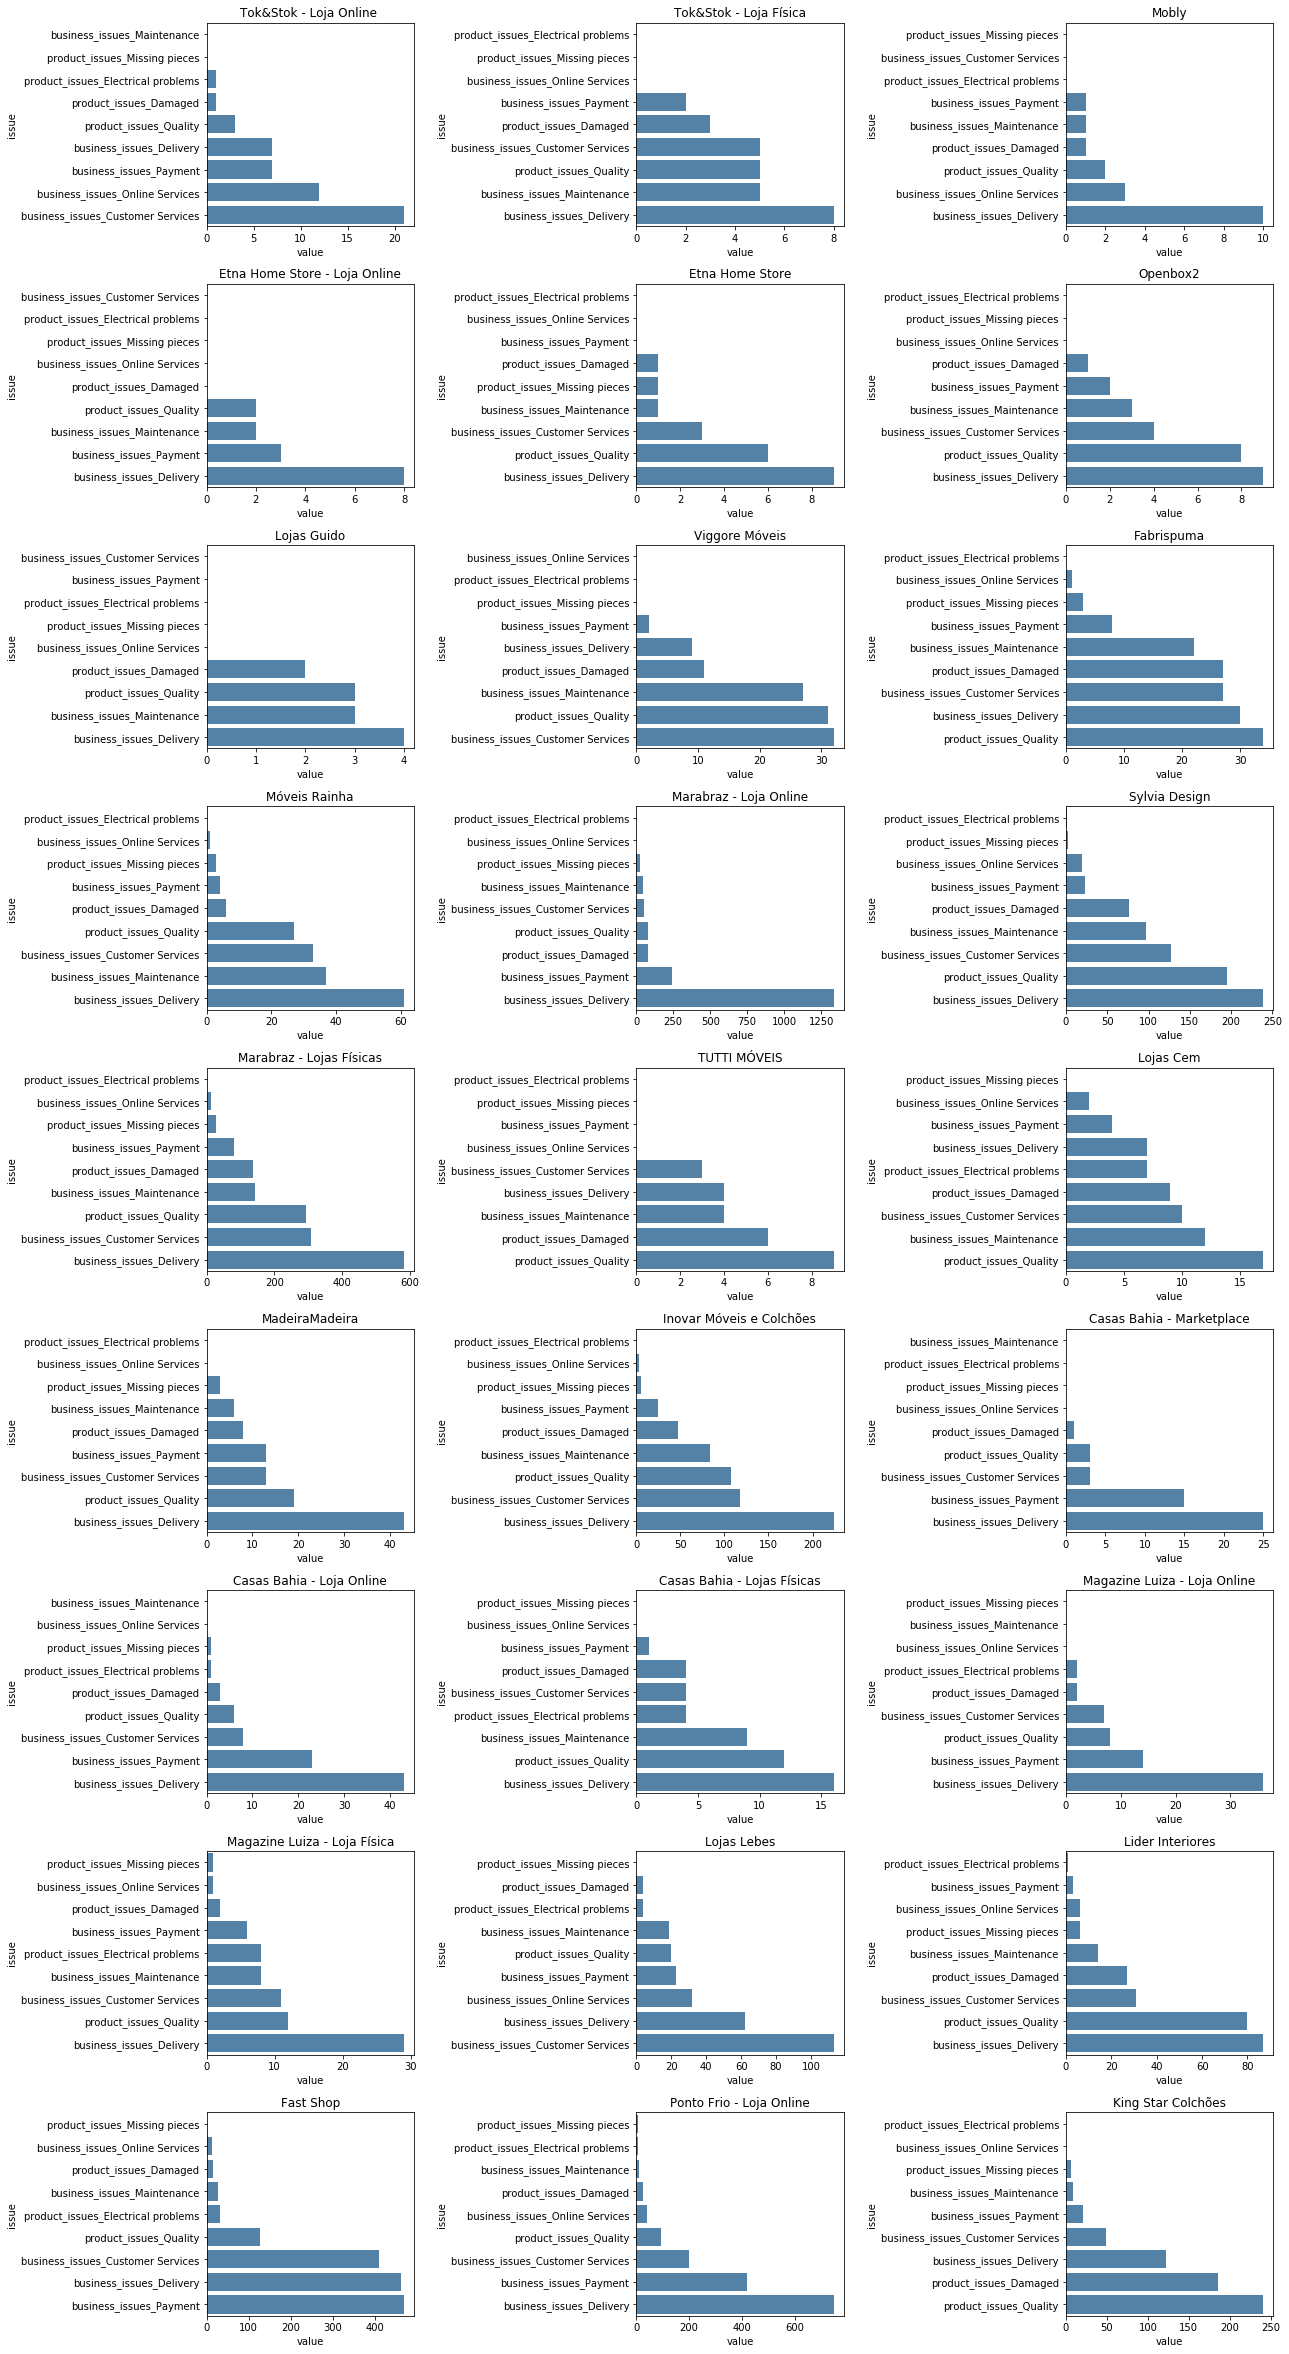

In [5]:
# Relative position ranking for each of our main macro issues categories

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
j=1
fig = plt.figure(figsize=(18,36))
for i in Stores:
    
    ax1 = plt.subplot(10,3,j)
   
    sns.barplot(x="value",y="issue", data=company_issues.loc[company_issues.business_name == i],color="steelblue")

    plt.title(i)
    j=j+1
plt.tight_layout()

In [86]:
def worst_issue(store):
    filter_= company_issues["business_name"] == store
    max_issue = company_issues[filter_]
    worst_issue = max_issue["value"].max()

    filter_2 = max_issue["value"] == worst_issue 
    issue = max_issue[filter_2]
    issue = issue["issue"]
    
    return(issue)

In [106]:
worst_issue("Fast Shop")

114    business_issues_Payment
Name: issue, dtype: object

In [8]:
company_issues.columns

Index(['business_name', 'issue', 'value'], dtype='object')

In [26]:
company_issues


,business_name,issue,value
242,Viggore Móveis,business_issues_Online Services,0
135,Casas Bahia - Loja Online,business_issues_Maintenance,0
173,Lojas Guido,business_issues_Customer Services,0
166,Etna Home Store - Loja Online,business_issues_Customer Services,0
91,Lojas Cem,product_issues_Missing pieces,0
...,...,...,...
195,Fast Shop,business_issues_Delivery,461
114,Fast Shop,business_issues_Payment,469
206,Marabraz - Lojas Físicas,business_issues_Delivery,583
210,Ponto Frio - Loja Online,business_issues_Delivery,747


In [107]:
def worst_store(issue):
    filter_= company_issues["issue"] == issue
    worst_store = company_issues[filter_]
    max_issue = worst_store["value"].max()
    
    fileter_2 = worst_store["value"] == max_issue
    max_ = worst_store[fileter_2]
    store = max_["business_name"]
    
    return(store)
    
    


In [108]:
worst_store("business_issues_Delivery")

205    Marabraz - Loja Online
Name: business_name, dtype: object
